# `STEP-1:` Importing Libraries & Loading Datasets.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [23]:
df = pd.read_csv("creditcard.csv")

In [24]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# `STEP-2:` Data Preprocessing & Preparing Datasets.

## Details of the Columns
Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

V1-V28: may be result of a PCA Dimensionality reduction to protect user identities and sensitive features

Amount: Transaction amount

Class: 1 for fraudulent transactions, 0 otherwise (dependent variable)

In [25]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null value is present.

In [26]:
df['Amount'].describe() #summary of the Amount.

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [27]:
df.shape

(284807, 31)

Let's check if the data is balanced or imbalanced. the percentage of fraud.

In [28]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [29]:
fraud = (df['Class'].values ==1).sum() 
fraud

492

In [30]:
non_fraud = (df['Class'].values ==0).sum() 
non_fraud

284315

In [31]:
classes=df['Class'].value_counts()
genuine_percent=classes[0]/df['Class'].count()*100
fraud_percent=classes[1]/df['Class'].count()*100
print(genuine_percent)
print(fraud_percent)

99.82725143693798
0.1727485630620034


# `STEP-3:` Exploratoty Data Analysis(EDA) & Visualization.

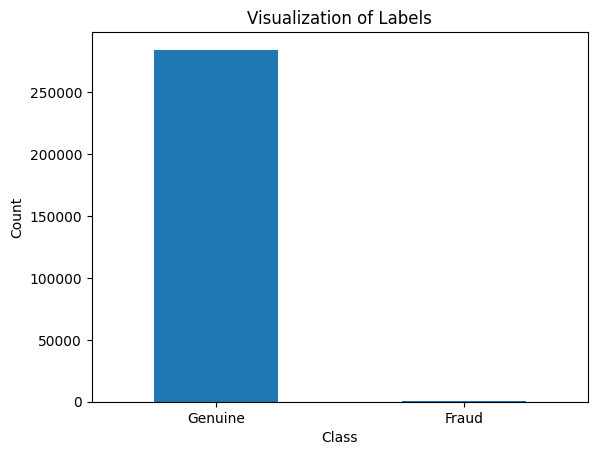

In [32]:
labels = ['Genuine','Fraud']
count = df.value_counts(df['Class'])
count.plot(kind = "bar",rot=0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

As we can see the number of fraudalent transactions are way too less that genuiene transactions. so we can say that it is an imbalanced dataset.

Let’s apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. We also drop the “Time” column as it is irrelevant.

fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(non_fraud['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

In [33]:
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [34]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [35]:
df.drop(['Amount','Time'], inplace =True, axis=1)

In [36]:
y = df.Class
X = df.drop(['Class'],axis=1)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

def KN_model(X, y):
    print("Splitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    print("Applying SMOTE on training data...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    print("Fitting KNN model...")
    kn = KNeighborsClassifier()
    kn.fit(X_train_resampled, y_train_resampled)
    
      # ---- Training Evaluation ----
    print("------------ Training Prediction --------------")
    y_train_preds = kn.predict(X_train_resampled)
    print("Classification Report (Train):\n", classification_report(y_train_resampled, y_train_preds))

    cf_matrix_train = confusion_matrix(y_train_resampled, y_train_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Train)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    print(f"Accuracy (Train): {accuracy_score(y_train_resampled, y_train_preds)*100:.2f}%\n")

    print("------------ Test Prediction --------------")
    y_test_preds = kn.predict(X_test)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_preds))

    cf_matrix = confusion_matrix(y_test, y_test_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (KNN - Test)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

    print(f"Accuracy (Test): {accuracy_score(y_test, y_test_preds)*100:.2f}%\n")


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

def RF_model(X, y):
    print("Splitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    print("Building pipeline (SMOTE + Random Forest)...")
    pipeline = Pipeline(steps=[
        ("smote", SMOTE(random_state=42)),
        ("rf", RandomForestClassifier(
            n_estimators=200,
            class_weight="balanced",   # important for imbalanced data
            random_state=42,
            n_jobs=-1
        ))
    ])

    print("Fitting pipeline...")
    pipeline.fit(X_train, y_train)

    # ✅ Save pipeline + features
    joblib.dump({"pipeline": pipeline, "features": X.columns.tolist()}, "model.pkl")
    print("Model pipeline saved as model3.pkl")

    # ---- Training Evaluation ----
    print("------------ Training Prediction --------------")
    y_train_preds = pipeline.predict(X_train)
    print("Classification Report (Train):\n", classification_report(y_train, y_train_preds))

    cf_matrix_train = confusion_matrix(y_train, y_train_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Train)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    print(f"Accuracy (Train): {accuracy_score(y_train, y_train_preds)*100:.2f}%\n")

    # ---- Test Evaluation ----
    print("------------ Test Prediction --------------")
    y_test_preds = pipeline.predict(X_test)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_preds))

    cf_matrix = confusion_matrix(y_test, y_test_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Random Forest - Test)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

    print(f"Accuracy (Test): {accuracy_score(y_test, y_test_preds)*100:.2f}%\n")

    return pipeline


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

def XGB_model(X, y):
    print("Splitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    print("Building pipeline (SMOTE + XGBoost)...")
    pipeline = Pipeline(steps=[
        ("smote", SMOTE(random_state=42)),
        ("xgb", XGBClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            use_label_encoder=False,
            eval_metric="logloss",
            scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1]))  # important for imbalance
        ))
    ])

    print("Fitting pipeline...")
    pipeline.fit(X_train, y_train)

    # ---- Training Evaluation ----
    print("------------ Training Prediction --------------")
    y_train_preds = pipeline.predict(X_train)
    print("Classification Report (Train):\n", classification_report(y_train, y_train_preds))

    cf_matrix_train = confusion_matrix(y_train, y_train_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Train)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    print(f"Accuracy (Train): {accuracy_score(y_train, y_train_preds)*100:.2f}%\n")

    # ---- Test Evaluation ----
    print("------------ Test Prediction --------------")
    y_test_preds = pipeline.predict(X_test)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_preds))

    cf_matrix = confusion_matrix(y_test, y_test_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (XGBoost - Test)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

    print(f"Accuracy (Test): {accuracy_score(y_test, y_test_preds)*100:.2f}%\n")

    return pipeline 


In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

# Compare models
KN_model(X, y)
XGB_model(X, y)
RF_model(X, y)


Splitting dataset...
Applying SMOTE on training data...
Fitting KNN model...
------------ Training Prediction --------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def compare_models(X, y):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    
    # Apply SMOTE only on training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Define models
    models = {
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            use_label_encoder=False,
            eval_metric="logloss"
        )
    }
    
    results = []
    
    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results.append({
            "Model": name,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    print("📊 Model Comparison:\n")
    print(results_df)
    
    # Plot bar chart
    plt.figure(figsize=(8,6))
    results_df.set_index("Model")[["Precision", "Recall", "F1-Score"]].plot(kind="bar")
    plt.title("Model Comparison on Credit Card Fraud Detection")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.legend(loc="lower right")
    plt.show()
    
    return results_df


In [ ]:

results_df = compare_models(X, y)
